# NBACK_CLASSIFICATION BRANCH 

In [1]:
from glob import glob as glob
import numpy as np
from nback import *

from datetime import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%reload_ext autoreload
%autoreload 2

/Users/abeukers/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


- just realized that chance level in ML problems where emat is randomized is given by the stdev of the distribution of the emat initialization distribution. therefore, when evaluating, initialize cell state using a distribution of matching stdev

In [4]:
ML = MetaLearner(cell_size=30,depth=30,num_stim=30)

ADAM005


In [3]:
numback = 2
ML.reinitialize()
trainer = Trainer(ML,numback)
train_loss = trainer.train_loop(50000,500)

randomizing params
0.0 1.7618861
0.05 0.44449374
0.1 0.65372866
0.15 0.7824263
0.2 0.33012185
0.25 1.1296885
0.3 0.4114292
0.35 0.6021179
0.4 0.4187617
0.45 0.57150114
0.5 0.67494357
0.55 0.49869692
0.6 0.55588436
0.65 0.43075177
0.7 0.5336987
0.75 0.7369055
0.8 0.7627397
0.85 0.42877865
0.9 0.5849513
0.95 0.5264326
()


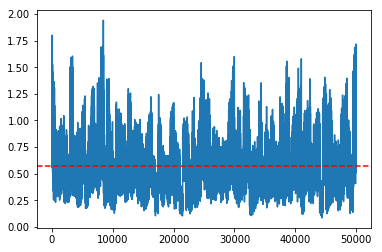

In [4]:
plt.plot(train_loss)
plt.axhline(np.mean(train_loss),c='r',ls='--')

In [9]:
numback=3
loss_arr.shape


(1000, 30)

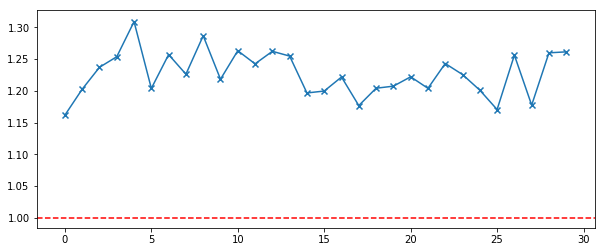

In [79]:
numback=4
# ML = MetaLearner(cell_size=30,depth=30,num_stim=30)
plt.figure(figsize=(10,4))
trainer = Trainer(ML,numback)
loss_arr = trainer.eval_loop(1000)
M = np.mean(loss_arr,0)
plt.plot(M)
plt.scatter(range(len(M)),M,marker='x')
plt.axhline(1,c='r',ls='--')

plt.savefig('figures/%iuntrained'%numback)

- compare current results to a situation where the same model is evaluated with noise injected into its cell state
- compare learning from models trained in 100epe+1000epe vs 1000epe+100epe. 
- currently no need for passing y(t-1) as input at t. in the future might want to consider training a network on nback tasks where n is changing between episodes, then y(t-1) will indeed be necessary.

## todo
- sweep cell size on 4back

# data from sweep

In [82]:
fpathL = glob("./models/*/*/*.npy")
fpathL

['./models/state_4-depth_30-epochs_50000-epochsperepisode_500/9/state_4-depth_30-epochs_50000-epochsperepisode_500.npy',
 './models/state_4-depth_30-epochs_50000-epochsperepisode_500/7/state_4-depth_30-epochs_50000-epochsperepisode_500.npy',
 './models/state_4-depth_30-epochs_50000-epochsperepisode_500/6/state_4-depth_30-epochs_50000-epochsperepisode_500.npy',
 './models/state_4-depth_30-epochs_50000-epochsperepisode_500/1/state_4-depth_30-epochs_50000-epochsperepisode_500.npy',
 './models/state_4-depth_30-epochs_50000-epochsperepisode_500/10/state_4-depth_30-epochs_50000-epochsperepisode_500.npy',
 './models/state_4-depth_30-epochs_50000-epochsperepisode_500/8/state_4-depth_30-epochs_50000-epochsperepisode_500.npy',
 './models/state_4-depth_30-epochs_50000-epochsperepisode_500/4/state_4-depth_30-epochs_50000-epochsperepisode_500.npy',
 './models/state_4-depth_30-epochs_50000-epochsperepisode_500/3/state_4-depth_30-epochs_50000-epochsperepisode_500.npy',
 './models/state_4-depth_30-epo

In [83]:
lossD = {}
for fpath in fpathL:
  stsize = int(fpath.split('-')[0].split('_')[1])
  if stsize not in lossD: lossD[stsize] = []
  lossD[stsize].append(np.load(fpath).squeeze())
  
lossD={stsize:np.array(lossD[stsize]) for stsize in sorted(lossD.keys())} 

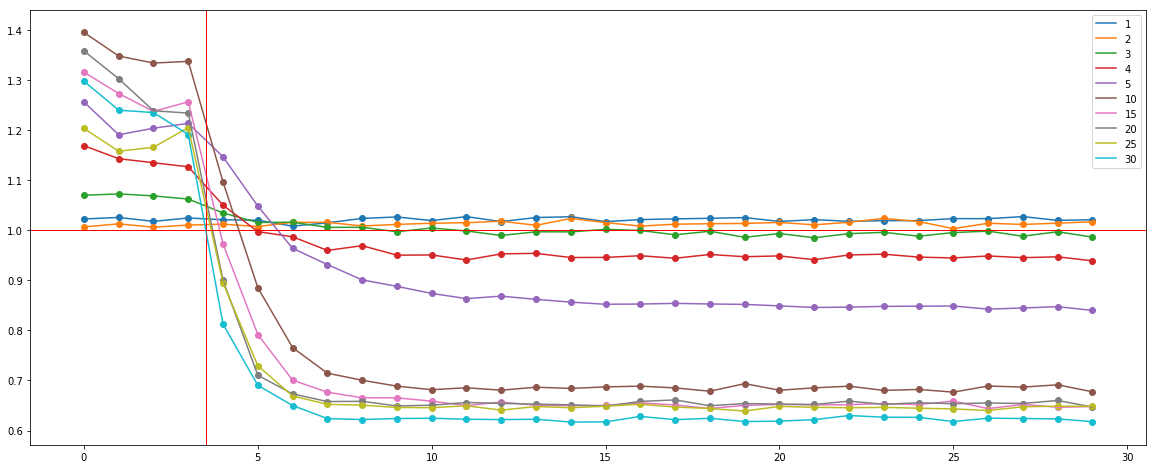

In [86]:
plt.figure(figsize=(20,8))
for stsize in lossD.keys():
  loss_arr = lossD[stsize] # net,episode,trial
  net_loss = np.mean(loss_arr,1) # net,trial
  M = np.mean(net_loss,0)
  plt.plot(M,label=stsize)
  plt.scatter(range(len(M)),M)
  plt.axvline(3.5,c='r',lw=.5)
  plt.axhline(1,c='r',lw=.5)
  plt.legend()
  
plt.savefig('figures/episode_loss-net_size')

# Todo
- if train on 4back classification, can I decode 3back and 2back from cell? if yes, use logistic regression to see if neurons that code for 4,3,2 back are pattern separated. alternatively, does the idea of 'shading' apply here?  

- how much better is cell size 200?
- sweep N 1-20 for high, mid and low size networks
- sweep numstim 30-5, 4back, cell size 10. 